In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("PreAnxiety.csv")
dataset.head(3)

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,Anxiety Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,More Anxious
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,More Anxious
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,Less Anxious


## EDA

## Univariate Analysis

## How many male and Female Students taken the Anxiety Survey?

In [3]:
dataset["2. Gender"].value_counts()

Male                 1405
Female                613
Prefer not to say      10
Name: 2. Gender, dtype: int64

we have more number of male students participating in this Anxiety Survey than female students

## From the survey, How many reported Less Anxious and More Anxious?

In [18]:
dataset["Anxiety Label"].value_counts()

More Anxious    1869
Less Anxious     159
Name: Anxiety Label, dtype: int64

More number of students reported they are anxious

## Most repeated CGPA Group?

In [32]:
dataset["6. Current CGPA"].mode()[0]

'3.00 - 3.39'

Most of our Surveyed people had the CGPA of 3.00 - 3.39

## Bivariate Analysis

## Which year students felt more anxious?

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

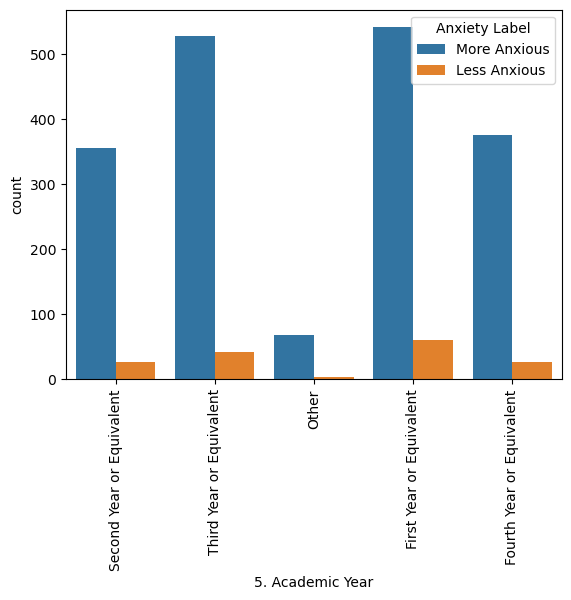

In [37]:
sns.countplot(x="5. Academic Year",hue=dataset["Anxiety Label"],data=dataset);
plt.xticks(rotation=90);

More Anxiety level observed in First Year Students

## Split Less Anxious and More Anxious by Gender

In [9]:
ct = pd.crosstab(dataset["2. Gender"],dataset["Anxiety Label"])

In [10]:
ct

Anxiety Label,Less Anxious,More Anxious
2. Gender,,
Female,29,584
Male,130,1275
Prefer not to say,0,10


<Axes: xlabel='2. Gender', ylabel='count'>

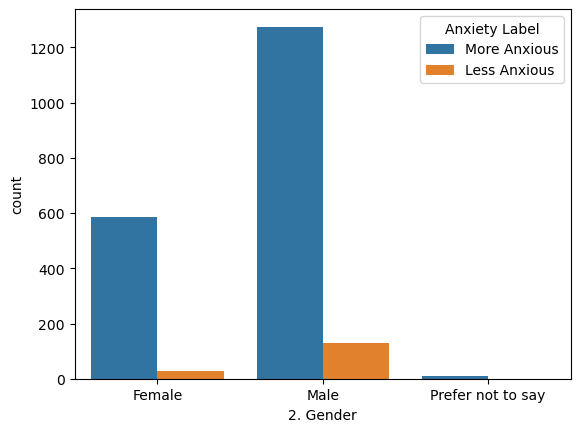

In [7]:
sns.countplot(x="2. Gender",hue="Anxiety Label", data=dataset);

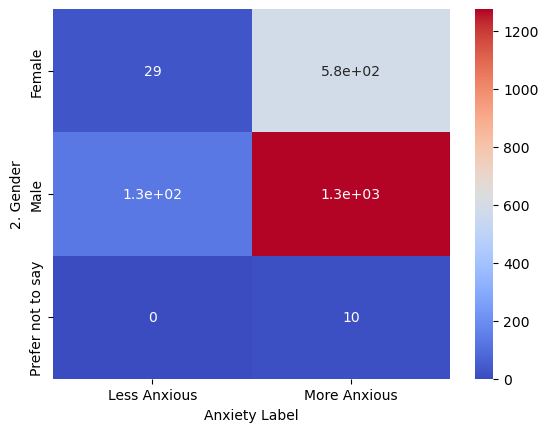

In [17]:
sns.heatmap(ct, annot=True, cmap="coolwarm");

## Do Gender has any relationship with Predicting Anxiety among Students?

In [16]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(dataset["2. Gender"],dataset["Anxiety Label"]))

Chi2ContingencyResult(statistic=12.93237916935218, pvalue=0.001555140187508156, dof=2, expected_freq=array([[4.80606509e+01, 5.64939349e+02],
       [1.10155325e+02, 1.29484467e+03],
       [7.84023669e-01, 9.21597633e+00]]))

From Chi Square Analysis, with p-value of 0.00155 we can reject the null hypothesis and accept alternate hypothesis. There is a strong relationship between gender to predict the outcome of Anxiety

In [19]:
chi2_contingency(pd.crosstab(dataset["6. Current CGPA"],dataset["Anxiety Label"]))

Chi2ContingencyResult(statistic=4.317801501185046, pvalue=0.5046244481597818, dof=5, expected_freq=array([[ 30.49852071, 358.50147929],
       [ 45.70857988, 537.29142012],
       [ 43.90532544, 516.09467456],
       [ 18.89497041, 222.10502959],
       [  6.58579882,  77.41420118],
       [ 13.40680473, 157.59319527]]))

From Chi Square Analysis, with p-value of 0.50462 we can reject the Alternate hypothesis and accept Null hypothesis. There is a no relationship between CGPA to predict the outcome of Anxiety

In [22]:
chi2_contingency(pd.crosstab(dataset["5. Academic Year"],dataset["Anxiety Label"]))

Chi2ContingencyResult(statistic=5.8067033708131435, pvalue=0.21405632560410875, dof=4, expected_freq=array([[ 47.11982249, 553.88017751],
       [ 31.59615385, 371.40384615],
       [  5.64497041,  66.35502959],
       [ 29.94970414, 352.05029586],
       [ 44.68934911, 525.31065089]]))

In [23]:
chi2_contingency(pd.crosstab(dataset["7. Did you receive a waiver or scholarship at your university?"],dataset["Anxiety Label"]))

Chi2ContingencyResult(statistic=2.073549456802558, pvalue=0.14987236432758558, dof=1, expected_freq=array([[ 125.60059172, 1476.39940828],
       [  33.39940828,  392.60059172]]))

In [24]:
chi2_contingency(pd.crosstab(dataset["4. Department"],dataset["Anxiety Label"]))

Chi2ContingencyResult(statistic=11.646711610429804, pvalue=0.3907758213452014, dof=11, expected_freq=array([[7.44822485e+00, 8.75517751e+01],
       [1.13683432e+01, 1.33631657e+02],
       [1.10468935e+02, 1.29853107e+03],
       [3.92011834e+00, 4.60798817e+01],
       [9.95710059e+00, 1.17042899e+02],
       [5.33136095e+00, 6.26686391e+01],
       [3.13609467e-01, 3.68639053e+00],
       [3.68491124e+00, 4.33150888e+01],
       [7.84023669e-02, 9.21597633e-01],
       [7.84023669e-02, 9.21597633e-01],
       [6.19378698e+00, 7.28062130e+01],
       [1.56804734e-01, 1.84319527e+00]]))

In [25]:
chi2_contingency(pd.crosstab(dataset["3. University"],dataset["Anxiety Label"]))

Chi2ContingencyResult(statistic=40.851695049638764, pvalue=0.00018768395752255721, dof=14, expected_freq=array([[ 39.5147929 , 464.4852071 ],
       [  1.56804734,  18.43195266],
       [  1.09763314,  12.90236686],
       [  4.93934911,  58.06065089],
       [  0.86242604,  10.13757396],
       [ 15.83727811, 186.16272189],
       [ 12.70118343, 149.29881657],
       [  3.29289941,  38.70710059],
       [ 41.71005917, 490.28994083],
       [ 21.09023669, 247.90976331],
       [  6.82100592,  80.17899408],
       [  3.92011834,  46.07988166],
       [  1.80325444,  21.19674556],
       [  2.43047337,  28.56952663],
       [  1.4112426 ,  16.5887574 ]]))

In [26]:
chi2_contingency(pd.crosstab(dataset["1. Age"],dataset["Anxiety Label"]))

Chi2ContingencyResult(statistic=14.984476120930697, pvalue=0.004733523236222037, dof=4, expected_freq=array([[1.02236686e+02, 1.20176331e+03],
       [5.42544379e+01, 6.37745562e+02],
       [1.96005917e+00, 2.30399408e+01],
       [2.35207101e-01, 2.76479290e+00],
       [3.13609467e-01, 3.68639053e+00]]))

From the chi square test, we can say, only the Age, University, Gender is statistically significant (has p value less than 5%). 